In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Aller dans le répertoire sentiment_analysis sur Drive
%cd /content/drive/MyDrive/sentiment_analysis


Mounted at /content/drive
/content/drive/MyDrive/sentiment_analysis


In [2]:
# Création du fichier README.md
with open("README.md", "w") as f:
    f.write("# sentiment_analysis\n\nAnalyse de sentiments sur Twitter.\n")


In [3]:
# Création du fichier .gitignore
with open(".gitignore", "w") as gitignore:
    gitignore.write("""\
# Ignorer les fichiers CSV et volumineux
*.csv
*.pkl
*.npz

# Ignorer les checkpoints Jupyter Notebook
.ipynb_checkpoints/

# Ignorer les caches Python
__pycache__/
*.py[cod]

# Ignorer les fichiers temporaires ou de sauvegarde
*.tmp
*.log
*.bak
*.swp
~*

# Ignorer les fichiers système
.DS_Store

# Ignorer le dossier data/
data/
""")


In [4]:
# Initialiser le dépôt Git
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/sentiment_analysis/.git/


In [5]:
# Ajouter les fichiers au commit
!git add README.md .gitignore

# Faire le commit
!git commit -m "First commit: Ajout du README et du .gitignore"


[master (root-commit) 57206c7] First commit: Ajout du README et du .gitignore
 2 files changed, 27 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 README.md


In [6]:
# Configurer le nom d'utilisateur et l'adresse email
!git config --global user.name "JulienDataScientist64"
!git config --global user.email "jcantalapiedra1@gmail.com"


In [7]:
# Créer le dossier .ssh
!mkdir -p ~/.ssh

# Copier les clés SSH depuis Drive
!cp /content/drive/MyDrive/ssh_keys/id_rsa ~/.ssh/id_rsa
!cp /content/drive/MyDrive/ssh_keys/id_rsa.pub ~/.ssh/id_rsa.pub

# Définir les permissions
!chmod 600 ~/.ssh/id_rsa

# Ajouter GitHub aux hôtes connus
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# Vérifier la connexion SSH avec GitHub
!ssh -T git@github.com


# github.com:22 SSH-2.0-f8a638b02
Hi JulienDataScientist64! You've successfully authenticated, but GitHub does not provide shell access.


In [11]:
# Vérifie si un remote 'origin' existe déjà
!git remote -v

# Si un remote 'origin' existe déjà et est incorrect, supprime-le
!git remote remove origin

# Ajouter le remote correct
!git remote add origin git@github.com:JulienDataScientist64/sentiment_analysis.git

origin	git@github.com:JulienDataScientist64/sentiment_analysis.git (fetch)
origin	git@github.com:JulienDataScientist64/sentiment_analysis.git (push)


In [13]:
!git branch -M main


In [14]:
!git push -u origin main

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 537 bytes | 67.00 KiB/s, done.
Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
To github.com:JulienDataScientist64/sentiment_analysis.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [19]:
# Ajouter tous les fichiers dans le répertoire notebook
!git add notebook/*

# Faire un commit avec un message
!git commit -m "Ajout des notebooks d'analyse de sentiments"

# Pousser le commit vers GitHub
!git push


[main 1b4caf3] Ajout des notebooks d'analyse de sentiments
 1 file changed, 1 insertion(+)
 create mode 100644 notebook/analyse de sentiments.ipynb
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 40.21 KiB | 3.09 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
To github.com:JulienDataScientist64/sentiment_analysis.git
   57206c7..1b4caf3  main -> main


In [20]:
# Afficher les modifications
!git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebook/analyse de sentiments.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	src/

no changes added to commit (use "git add" and/or "git commit -a")


# **Réalisez une analyse de sentiments grâce au Deep Learning**  
---
# **Contexte**

Je suis ingénieur IA chez **MIC (Marketing Intelligence Consulting)**, un cabinet spécialisé dans les solutions de marketing digital basées sur l’intelligence artificielle. Récemment, nous avons été missionnés par **Air Paradis**, une compagnie aérienne, pour les aider à améliorer leur image sur les réseaux sociaux. Leur problématique est claire : ils souhaitent anticiper et limiter les **bad buzz** en identifiant rapidement les tweets à sentiment négatif.

Pour répondre à leur besoin, mon objectif est de développer un **prototype d’IA** capable de prédire le sentiment d’un tweet, c'est-à-dire déterminer s'il exprime un sentiment **positif** ou **négatif**. Ce prototype sera également **déployé sur le Cloud**, afin de permettre une intégration facile dans leurs systèmes internes.

---

# **Problématique**

Comment concevoir une solution IA performante et facilement déployable, capable de prédire avec précision le sentiment associé à un tweet, tout en intégrant une démarche **MLOps complète** pour garantir le suivi et l’amélioration continue du modèle en production ?

L’objectif n’est pas seulement de répondre à la demande spécifique d’Air Paradis, mais aussi de proposer une solution généralisable à d’autres cas d’usage dans le domaine du marketing digital.

---

# **Objectif du projet**

1. **Construire un prototype fonctionnel** :
   - Créer un modèle capable de prédire le sentiment d’un tweet.
   - Explorer plusieurs approches, des modèles classiques aux modèles avancés de Deep Learning, y compris l’utilisation de **BERT**.

2. **Déployer une API Cloud** :
   - Fournir une interface accessible pour tester et utiliser le modèle en production.

3. **Adopter une démarche orientée MLOps** :
   - Assurer le **suivi des expérimentations** avec MLFlow.
   - Mettre en œuvre un pipeline de **déploiement continu** avec des tests automatisés.
   - Intégrer un système de **suivi en production**, avec la possibilité de tracer les prédictions incorrectes et de générer des alertes en cas d’anomalies.

---

Avec cette mission, je vais démontrer non seulement ma capacité à construire des modèles performants, mais aussi à intégrer une méthodologie MLOps robuste, essentielle pour la mise en production des modèles IA dans un environnement réel.


# 1. Préparation et Exploration des Données
- **Importer les données Open Source** : Télécharge et charge les données dans un DataFrame Pandas.
- **Exploration des Données (EDA)** :
  - Analyser les distributions des sentiments, les heures de publication, etc.
  - Identifier les caractéristiques clés (longueur des tweets, utilisation de hashtags/mentions, etc.).
- **Nettoyage des données** : Utilise le processus de nettoyage que nous avons déjà élaboré.

# 2. Développement des Modèles de Prédiction de Sentiment
### Approche 1 : Modèle sur Mesure Simple
- **Pré-traitement des Données** : Utilise des techniques de transformation textuelle comme TF-IDF pour vectoriser les tweets.
- **Modèle Classique** : Implémente une régression logistique (ou un autre modèle de machine learning classique) pour prédire le sentiment.
- **Évaluation du Modèle** : Utilise des métriques comme l'Accuracy, le F1-score, et l'AUC-ROC pour évaluer les performances.

### Approche 2 : Modèle sur Mesure Avancé
- **Pré-traitement Avancé** : Implémente des embeddings de mots (Word2Vec, GloVe, ou FastText) pour les tweets.
- **Modèle de Réseaux de Neurones Profonds** : Crée un modèle de réseau de neurones avec TensorFlow/Keras, utilisant des embeddings comme couche d'entrée.
- **Essai de Différents Embeddings** : Compare les performances de plusieurs embeddings et conserve le meilleur.
- **Expérimentation avec BERT** : Utilise un modèle pré-entraîné comme BERT (par exemple, avec transformers de Hugging Face) pour comparer les performances avec les embeddings plus simples.
- **Évaluation** : Compare les performances des différentes approches pour choisir la meilleure.

# 3. Gestion des Expérimentations avec MLFlow
- **Installation et Configuration de MLFlow** : Installe MLFlow et configure un tracking server local ou distant.
- **Tracking des Expériences** :
  - Suis les hyperparamètres, les performances des modèles, et les versions des données.
  - Log les modèles entraînés pour une gestion efficace.
- **Reporting avec MLFlow** : Génère des rapports détaillés pour chaque expérience.

# 4. Déploiement du Modèle via une API
- **Création de l’API** : Utilise Flask ou FastAPI pour créer une API qui reçoit un tweet, l’analyse, et renvoie la prédiction de sentiment.
- **Déploiement sur une Solution Cloud Gratuite** :
  - **Options** : Azure Web App (gratuit ASP F1), Heroku (avec plan étudiant), ou PythonAnywhere.
  - Déploie l’API et vérifie qu’elle fonctionne correctement.

# 5. Mise en Œuvre d'une Démarche MLOps
- **Présentation des Principes de MLOps** : Prépare un support expliquant les concepts clés de MLOps (automatisation, traçabilité, monitoring).
- **Pipeline de Déploiement Continu** :
  - Utilise Git + GitHub pour la gestion du code source.
  - Configure des tests unitaires pour le code d’entraînement et le code de l’API.
  - Intègre un pipeline de CI/CD pour automatiser le déploiement (GitHub Actions, par exemple).

# 6. Suivi de la Performance du Modèle en Production
- **Configurer Azure Application Insights** : Crée un service Azure Application Insights pour le monitoring.
- **Remonter les Anomalies** :
  - Log les tweets mal prédits et les erreurs associées.
  - Déclenche une alerte (SMS ou email) si plus de 3 tweets sont mal prédits en 5 minutes.
- **Analyse et Amélioration Continue** : Propose une méthode pour analyser les statistiques et améliorer le modèle dans le temps.

# 7. Rédaction de l'Article pour le Blog
- **Contenu de l'Article** :
  - Explique la méthodologie utilisée (modélisation, MLOps).
  - Présente les résultats des expérimentations.
  - Détaille les bénéfices de l’approche MLOps pour assurer la fiabilité et la maintenabilité des modèles d’IA.

# Ressources à Utiliser
- **Modèles et Bibliothèques** :
  - scikit-learn pour les modèles classiques.
  - TensorFlow/Keras pour les réseaux de neurones.
  - transformers de Hugging Face pour BERT.
  - MLFlow pour la gestion des expérimentations.
  - Flask ou FastAPI pour l'API.
- **Services Cloud Gratuits** :
  - Azure : Déploiement d'API avec Azure Web App (plan gratuit).
  - Heroku : Déploiement d'API avec le package étudiant.

# Plan d'Action
1. **Étape 1** : Nettoyage et exploration des données.
2. **Étape 2** : Implémentation et évaluation des modèles.
3. **Étape 3** : Gestion des expérimentations avec MLFlow.
4. **Étape 4** : Déploiement de l'API et configuration de MLOps.
5. **Étape 5** : Monitoring et suivi des performances.
6. **Étape 6** : Rédaction de l'article pour le blog.


In [ ]:
import pandas as pd
import warnings
from IPython.display import display, Markdown
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration des options de pandas pour l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None

# Gestion des avertissements
warnings.filterwarnings('ignore', category=DeprecationWarning)

def display_info(key, value):
    """ Affiche les informations dans un format markdown. """
    display(Markdown(f"**{key}:** {value}"))

# Fonction de séparation pour affichage clair
def display_separator():
    """ Affiche un séparateur markdown. """
    display(Markdown("-" * 80))

# Fonction pour afficher le docstring
def display_docstring(func):
    display(Markdown(f"**Documentation for {func.__name__}:**\n\n{func.__doc__}"))


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Generer une clef SSh pour GitHub
!ssh-keygen -t rsa -b 4096 -C "jcantalapiedra1@gmail.com" -f ~/.ssh/id_rsa -N ""

Generating public/private rsa key pair.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:YuKSGw1yvGc/HFxugpx3ExvaOurPORK0f8RokL/q1HM jcantalapiedra1@gmail.com
The key's randomart image is:
+---[RSA 4096]----+
|                 |
|                 |
|     .           |
| .  +   +        |
|. +o.BoBS+       |
| o **+X.X        |
|  = **oOE.       |
|   B.oO+.        |
|  .o====         |
+----[SHA256]-----+


In [ ]:
# Afficher ka clef SSh pour la copier dans Git
!cat ~/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDFFba19ViPyPqUZGQbjJCXHsot0BtVA7/+QZyDaGUTMvCJ/VQn8Dr7NeteG/gTegNcGXu6+x2WgVlupIHVdj+VGH3tq0whYlh0OYpgv+fy6FcDvXV9xv7EwbClkwI9Bm0VWlzgjoPnuPrDpTgRAmdW5lb0h1bqJx+i6Am2eXhneyxHGtcrl0W8zPSFQF4oOKnFNcBv6P4/A/jnlNgABOX7Tx3uPoFr0fH3hJiHCryXPUhKCKfsZp/1Hvnn8D2MS5bRVgEXI90zx0vGuRy1uFokbaXQcHVQ8nciZ38/MnPD6kPlWgePI/FGY3RsMeNMIbZ4WQN/VwyOgAGi7FYvDi7c+iuQmI5bl0LQ6Cngu7PQEeZj0tK1M8FcnXIdCpDCHT9hwEhwPdwbicerUOJceXEJKt8KzV9bXz4uwGK+cA/PXwvyCUduR75vXskMzzY30dMJD2/DlqvKfWvr0pCWCJZlG3/ThfwZb9c3pNvuTlLF39ukYl1F7tcD6Tq2oFXT6Rxj5k4gjhAsg9/l6d8Ny0WkPv6+V21mDKCy+z8iGm2uyl2wDJbhdKDOoNGQ6DtWyheJhpAhUPrZivI7ORb2YKG53Etn1LqZzTVK8Ku6bSGEC9lp61MhsNVr1AhRvejZhYO0lmIFyFhY3U4rRCSiScqnuyJsomxg3UgueSqyhrZgew== jcantalapiedra1@gmail.com


In [ ]:
# Créer le dossier sur mon drive avec copie des clefs
!mkdir -p /content/drive/MyDrive/ssh_keys  # Créer le dossier ssh_keys sur Google Drive
!cp ~/.ssh/id_rsa /content/drive/MyDrive/ssh_keys/id_rsa  # Copier la clé privée
!cp ~/.ssh/id_rsa.pub /content/drive/MyDrive/ssh_keys/id_rsa.pub  # Copier la clé publique

In [ ]:
# A chaque redemarrage de session colab
!mkdir -p ~/.ssh  # Créer le répertoire SSH
!cp /content/drive/MyDrive/ssh_keys/id_rsa ~/.ssh/id_rsa  # Copier la clé privée
!cp /content/drive/MyDrive/ssh_keys/id_rsa.pub ~/.ssh/id_rsa.pub  # Copier la clé publique
!chmod 600 ~/.ssh/id_rsa  # Appliquer les permissions correctes à la clé privée
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts  # Ajouter GitHub aux hôtes connus
!ssh -T git@github.com  # Tester la connexion SSH

# github.com:22 SSH-2.0-babeld-9e2e2a76e
Hi JulienDataScientist64! You've successfully authenticated, but GitHub does not provide shell access.


# 1. Préparation et Exploration des Données

In [ ]:
# Définition du chemin des données
file_path =  '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/training.csv'
data = pd.read_csv(file_path, encoding='latin1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()  # Affiche les premières lignes des données
data.info()  # Affiche la structure des données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1599999 non-null  int64 
 1   ids        1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user       1599999 non-null  object
 5   TweetText  1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Analyse Préliminaire et Compréhension des Données

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Chargement des données...
Données chargées : 1581465 lignes après suppression des doublons.
Début de l'EDA...
Nettoyage des tweets en cours...
Nettoyage terminé.


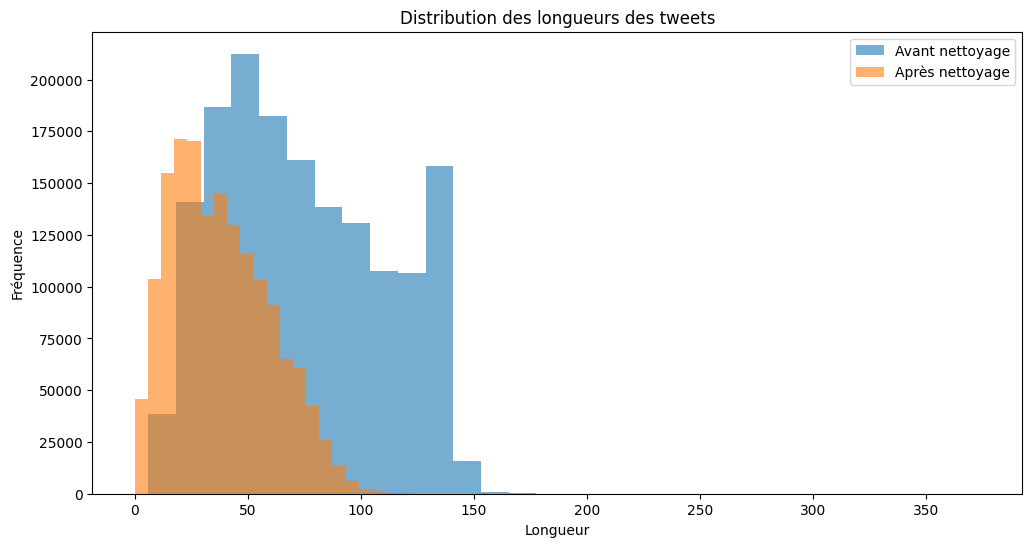

<Figure size 1200x600 with 0 Axes>

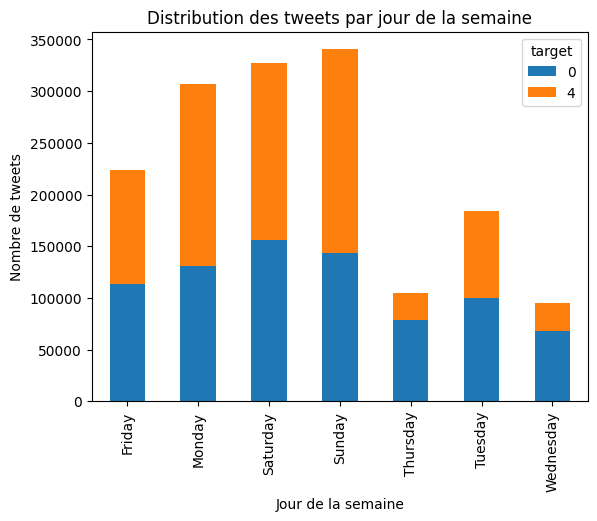

<Figure size 1200x600 with 0 Axes>

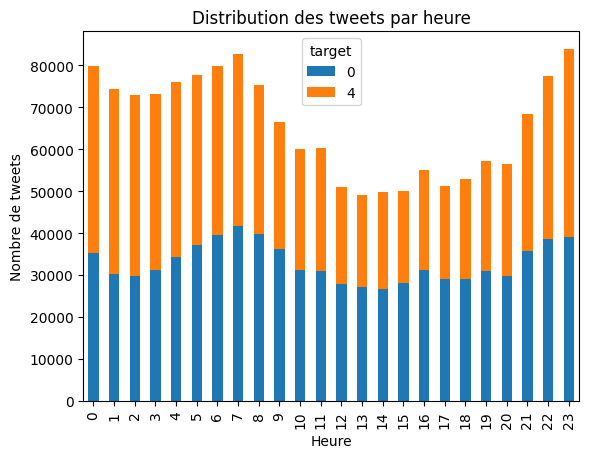

Nombre de tweets positifs : 791281
Nombre de tweets négatifs : 790184
EDA terminé.


In [29]:
# Ajouter le dossier src au path Python
import sys
sys.path.append('/content/drive/MyDrive/sentiment_analysis/src/')

# Importer la classe SentimentEDA
from sentiment_eda import SentimentEDA

# Créer une instance et exécuter le script
eda = SentimentEDA(file_path='/content/drive/MyDrive/sentiment_analysis/training.csv')
eda.load_data()
eda.perform_eda()


In [31]:
# Lister les fichiers et dossiers
!ls -R /content/drive/MyDrive/sentiment_analysis


/content/drive/MyDrive/sentiment_analysis:
data  notebook	README.md  src	test_data.csv  train_data.csv  training.csv

/content/drive/MyDrive/sentiment_analysis/data:

/content/drive/MyDrive/sentiment_analysis/notebook:
'analyse de sentiments.ipynb'

/content/drive/MyDrive/sentiment_analysis/src:
config.py    main.py  preprocessing.py	sentiment_analysis_project.egg-info  train_model.py
__init__.py  models   __pycache__	sentiment_eda.py

/content/drive/MyDrive/sentiment_analysis/src/models:
bert_cnn.py  distilbert_cnn.py	lstm_fasttext.py  __pycache__
common.py    __init__.py	lstm_word2vec.py  tfidf_logistic_regression.py

/content/drive/MyDrive/sentiment_analysis/src/models/__pycache__:
common.cpython-310.pyc		lstm_fasttext.cpython-310.pyc
distilbert_cnn.cpython-310.pyc	lstm_word2vec.cpython-310.pyc
__init__.cpython-310.pyc	tfidf_logistic_regression.cpython-310.pyc

/content/drive/MyDrive/sentiment_analysis/src/__pycache__:
__init__.cpython-310.pyc  preprocessing.cpython-310.pyc  sentime

In [32]:
# Aller dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le fichier sentiment_eda.py
!git add src/sentiment_eda.py

# Ajouter le fichier sentiment_eda.py
!git add src/sentiment_eda.py

# Faire un commit avec un message clair
!git commit -m "Ajout du script sentiment_eda.py"

# Pousser les modifications
!git push

/content/drive/MyDrive/sentiment_analysis
[main 98126ed] Ajout du script sentiment_eda.py
 1 file changed, 115 insertions(+)
 create mode 100644 src/sentiment_eda.py
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 1.91 KiB | 326.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:JulienDataScientist64/sentiment_analysis.git
   1b4caf3..98126ed  main -> main


* Structure des Données
sentiment : Label binaire (0 = négatif, 4 = positif).
id : Identifiant unique du tweet.
date : Date de publication du tweet.
query : "NO_QUERY" pour tous les tweets, donc probablement inutile.
user : Nom d'utilisateur qui a posté le tweet.
text : Contenu du tweet.

* Analyse des Exemples d'Identifiants Non Uniques
Nous avons plusieurs cas où le même identifiant (id) est associé à des tweets identiques, mais avec des labels de sentiment différents (0 pour négatif et 4 pour positif). Voici quelques observations :

Même Texte, Différents Labels : Pour chaque exemple, le texte du tweet est identique, mais le label de sentiment varie entre 0 et 4. Cela indique une incohérence possible dans l'étiquetage des données.
Utilisateur Identique : L'utilisateur ayant posté le tweet est également le même pour les deux entrées. Cela renforce l'idée que ces tweets sont des duplications avec des labels de sentiment discordants.

# Développement des Modèles de Prédiction

## Pour faire le commit du jour

In [ ]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Configurer SSH
!mkdir -p ~/.ssh
!cp /content/drive/MyDrive/ssh_keys/id_rsa ~/.ssh/id_rsa
!cp /content/drive/MyDrive/ssh_keys/id_rsa.pub ~/.ssh/id_rsa.pub
!chmod 600 ~/.ssh/id_rsa
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!ssh -T git@github.com

# Configurer Git (Nom et email)
!git config --global user.name "JulienDataScientist64"
!git config --global user.email "jcantalapiedra1@gmail.com"

# Naviguer dans le répertoire de ton projet (cloné ou existant dans Colab)
%cd /content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning

# Synchroniser avec les changements distants
!git pull origin main --allow-unrelated-histories

# Vérifier l'état des modifications
!git status

# Ajouter toutes les modifications
!git add .

# Créer un commit avec une description claire
!git commit -m "Description des changements du jour"

# Pousser les modifications vers GitHub
!git push origin main


#Procédure complète pour un nouveau projet dans Colab

In [ ]:
#Procédure complète pour un nouveau projet dans Colab#
from google.colab import drive
import os

# Étape 1 : Monter Google Drive
drive.mount('/content/drive')

# Étape 2 : Configurer SSH
!mkdir -p ~/.ssh
!cp /content/drive/MyDrive/ssh_keys/id_rsa ~/.ssh/id_rsa
!cp /content/drive/MyDrive/ssh_keys/id_rsa.pub ~/.ssh/id_rsa.pub
!chmod 600 ~/.ssh/id_rsa
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!ssh -T git@github.com

# Étape 3 : Configurer Git (Nom et email)
!git config --global user.name "JulienDataScientist64"
!git config --global user.email "jcantalapiedra1@gmail.com"

# Étape 4 : Créer un répertoire pour le projet
new_project_path = '/content/drive/MyDrive/mon_nouveau_projet'
os.makedirs(new_project_path, exist_ok=True)
%cd {new_project_path}

# Étape 5 : Créer un fichier README.md
with open("README.md", "w") as f:
    f.write("# Mon Nouveau Projet\n\nDescription de mon projet.")

# Étape 6 : Initialiser Git dans le répertoire
!git init

# Étape 7 : Créer un fichier .gitignore
with open(".gitignore", "w") as gitignore:
    gitignore.write("""
training.csv
*.csv
__pycache__/
*.pkl
.DS_Store
config.json

# Ignorer les fichiers PNG
*.png

# Ignorer les fichiers temporaires ou de sauvegarde
*.tmp
*.log
*.bak
*.swp
~*
->>rajouter pour ignorer data set et touts les fichier volumineux sans importance
# Ignorer les sorties de Jupyter Notebook
.ipynb_checkpoints/
""")

# Étape 8 : Ajouter et commiter les fichiers
!git add .
!git commit -m "Initial commit: ajout du README et configuration initiale"

# Étape 9 : Lier le dépôt GitHub (remplace par le lien de ton dépôt GitHub)
!git remote add origin git@github.com:JulienDataScientist64/mon_nouveau_projet.git

# Étape 10 : Pousser les modifications vers GitHub
!git push -u origin main


#Pre Processing

In [ ]:
import pandas as pd

# Chemin vers le fichier d'entrée
FILE_PATH = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/training.csv'

# Nom des colonnes du dataset
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]

# Chargement du dataset avec le bon encodage
data = pd.read_csv(FILE_PATH, encoding='latin1', names=DATASET_COLUMNS)

# Suppression des doublons pour éviter les répétitions
data.drop_duplicates(subset="TweetText", inplace=True)

# Conversion des labels : remplacer le label 4 par 1 (sentiment positif)
data['target'] = data['target'].replace(4, 1)

# **Étape 1 : Création du dataset de test équilibré**
# Échantillonnage de 2500 tweets négatifs et 2500 tweets positifs
test_negatives = data[data['target'] == 0].sample(2500, random_state=42)
test_positives = data[data['target'] == 1].sample(2500, random_state=42)

# Concaténation et mélange aléatoire des échantillons pour le dataset de test
hidden_data = pd.concat([test_negatives, test_positives]).sample(frac=1, random_state=42).reset_index(drop=True)

# Sauvegarde du dataset de test
hidden_data_PATH = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/test_data.csv'
hidden_data.to_csv(hidden_data_PATH, index=False)

# Suppression des tweets de test du dataset principal
data = data[~data['TweetText'].isin(hidden_data['TweetText'])]

# **Étape 2 : Création d'un dataset équilibré pour l'entraînement**
# Échantillonnage équilibré de 100,000 tweets pour chaque classe
negatives = data[data['target'] == 0].sample(100000, random_state=42)
positives = data[data['target'] == 1].sample(100000, random_state=42)

# Concaténation et mélange aléatoire des échantillons pour l'entraînement
balanced_data = pd.concat([negatives, positives]).sample(frac=1, random_state=42).reset_index(drop=True)

# Sauvegarde du dataset équilibré d'entraînement
TRAIN_DATA_PATH = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/train_data.csv'
balanced_data.to_csv(TRAIN_DATA_PATH, index=False)

# **Vérifications des données**
# Taille et répartition des classes dans le dataset hidden_data
print("Taille des données hidden_data :", hidden_data.shape)
print("Répartition des classes dans le dataset hidden_data :\n", hidden_data['target'].value_counts())

# Taille et répartition des classes dans le dataset d'entraînement
print("\nTaille des données d'entraînement :", balanced_data.shape)
print("Répartition des classes dans le dataset d'entraînement :\n", balanced_data['target'].value_counts())

# Aperçu des données
print("\nAperçu des données hidden_data :")
print(hidden_data.head())
print("\nColonnes du DataFrame d'entraînement :", balanced_data.columns)
print("\nAperçu des données d'entraînement :")
print(balanced_data.head())


Taille des données de test : (5000, 6)
Répartition des classes dans le dataset de test :
 target
0    2500
1    2500
Name: count, dtype: int64

Taille des données d'entraînement : (200000, 6)
Répartition des classes dans le dataset d'entraînement :
 target
1    100000
0    100000
Name: count, dtype: int64

Aperçu des données de test :
   target         ids                          date      flag           user  \
0       0  2255153540  Sat Jun 20 10:50:18 PDT 2009  NO_QUERY  Charmed231281   
1       1  1881316460  Fri May 22 04:18:01 PDT 2009  NO_QUERY      natneagle   
2       1  2056281230  Sat Jun 06 10:51:32 PDT 2009  NO_QUERY        HippyDi   
3       0  1556845050  Sun Apr 19 00:37:54 PDT 2009  NO_QUERY      stephyang   
4       0  1833915956  Mon May 18 00:55:46 PDT 2009  NO_QUERY   anbudan_BALA   

                                           TweetText  
0        Today i have night work at the airport fun   
1                  @ra1ne yea  so glad you liked it!  
2        @orangy6

## Régression Logistique TF-IDF

In [19]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 123.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00


In [23]:
!python /content/drive/MyDrive/sentiment_analysis/scripts_model/regression_logistique_tfidf.py \
    --data_path "/content/drive/MyDrive/sentiment_analysis/train_data.csv" \
    --output_dir "/content/drive/MyDrive/sentiment_analysis"


Chargement des données depuis /content/drive/MyDrive/sentiment_analysis/train_data.csv...
2025/01/06 17:42:09 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/06 17:42:11 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'toarray'
Fitting 3 folds for each of 24 candidates, totalling 72 fits
2025/01/06 17:42:25 INFO mlflow.sklearn.utils: Logging the 5 best runs, 19 runs will be omitted.

Validation Accuracy : 0.7805333333333333
Validation F1 Score : 0.783776683087028

Test Accuracy : 0.7827
Test F1 Score : 0.7844174741228215

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.79      0.77      0.78 

In [24]:
# Naviguer dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le script au dépôt
!git add scripts_model/regression_logistique_tfidf.py

# Faire un commit
!git commit -m "Ajout du script régression logistique avec TF-IDF maj"

# Pousser les modifications vers GitHub
!git push


/content/drive/MyDrive/sentiment_analysis
[main df80a21] Ajout du script régression logistique avec TF-IDF maj
 1 file changed, 35 insertions(+), 54 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 727 bytes | 181.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:JulienDataScientist64/sentiment_analysis.git
   7496bd0..df80a21  main -> main


In [4]:
import os
import pandas as pd
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

import mlflow
import mlflow.sklearn

from google.colab import drive
drive.mount('/content/drive')

# --------------------------------------------------
# 1. Configuration MLflow (stockage Google Drive)
# --------------------------------------------------
mlflow.set_tracking_uri("file:/content/drive/MyDrive/mlruns")
mlflow.set_experiment("Sentiment_Analysis_Models")

# --------------------------------------------------
# 2. Chargement du DataFrame et préparation des données
# --------------------------------------------------
data_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/train_data.csv'
balanced_data = pd.read_csv(data_path)[['target', 'TweetText']]

train_data, temp_data = train_test_split(
    balanced_data,
    test_size=0.3,
    random_state=42,
    stratify=balanced_data['target']
)
val_data, test_data = train_test_split(
    temp_data,
    test_size=0.5,
    random_state=42,
    stratify=temp_data['target']
)

# --------------------------------------------------
# 3. Vectorisation TF-IDF
# --------------------------------------------------
max_features = 5000
vectorizer = TfidfVectorizer(max_features=max_features)

X_train_tfidf = vectorizer.fit_transform(train_data['TweetText'])
y_train = train_data['target']

X_val_tfidf = vectorizer.transform(val_data['TweetText'])
y_val = val_data['target']

X_test_tfidf = vectorizer.transform(test_data['TweetText'])
y_test = test_data['target']

# --------------------------------------------------
# 4. GridSearchCV pour la LogReg
# --------------------------------------------------
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# --------------------------------------------------
# 5. Entraînement + tracking MLflow
# --------------------------------------------------
with mlflow.start_run(run_name="TF-IDF_RegressionLogistique"):
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_param("vectorizer", "TF-IDF")
    mlflow.log_param("max_features", max_features)

    mlflow.sklearn.autolog()

    # GridSearch
    grid_search.fit(X_train_tfidf, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Log des meilleurs hyperparamètres
    mlflow.log_params(best_params)

    # Validation
    y_val_pred = best_model.predict(X_val_tfidf)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    mlflow.log_metric("val_accuracy", val_accuracy)
    mlflow.log_metric("val_f1_score", val_f1)

    # Test
    y_test_pred = best_model.predict(X_test_tfidf)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_f1_score", test_f1)

    # Rapport de classification
    report = classification_report(y_test, y_test_pred)
    report_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/classification_report_LogReg.txt'
    with open(report_path, 'w') as f:
        f.write(report)
    mlflow.log_artifact(report_path)

    # --------------------------------------------------
    # 6. Sauvegarde du modèle et du vectoriseur
    # --------------------------------------------------
    model_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/tfidf_logistic_regression_best.pkl'
    vect_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/tfidf_vectorizer.pkl'
    joblib.dump(best_model, model_path)
    joblib.dump(vectorizer, vect_path)
    mlflow.log_artifact(model_path)
    mlflow.log_artifact(vect_path)

    print("\nValidation Accuracy :", val_accuracy)
    print("Validation F1 Score :", val_f1)
    print("\nTest Accuracy :", test_accuracy)
    print("Test F1 Score :", test_f1)
    print("\nClassification Report (Test):\n", report)

print("[INFO] Entraînement et évaluation terminés. Les logs sont dans 'file:/content/drive/MyDrive/mlruns'.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2025/01/05 17:33:50 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/01/05 17:33:54 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'toarray'


Fitting 3 folds for each of 24 candidates, totalling 72 fits


2025/01/05 17:34:12 INFO mlflow.sklearn.utils: Logging the 5 best runs, 19 runs will be omitted.



Validation Accuracy : 0.7805333333333333
Validation F1 Score : 0.783776683087028

Test Accuracy : 0.7827
Test F1 Score : 0.7844174741228215

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.79      0.77      0.78     15000
           1       0.78      0.79      0.78     15000

    accuracy                           0.78     30000
   macro avg       0.78      0.78      0.78     30000
weighted avg       0.78      0.78      0.78     30000

[INFO] Entraînement et évaluation terminés. Les logs sont dans 'file:/content/drive/MyDrive/mlruns'.


**Conclusion sur le modèle baseline : Régression Logistique avec TF-IDF**

Le modèle baseline utilisant une régression logistique avec des vecteurs TF-IDF obtient des résultats cohérents sur les ensembles de validation et de test :

- **Accuracy :** 78% sur les deux ensembles, montrant une bonne capacité de généralisation.
- **F1-Score :** 78%, indiquant un bon équilibre entre précision et rappel pour les deux classes.
- Les scores pour les classes `0` (négatif) et `1` (positif) sont équilibrés, sans biais vers l'une des classes.

Points forts
- Modèle simple et rapide à entraîner.
- Bonne généralisation des performances entre validation et test.

Limites
- Ne capture pas les relations contextuelles profondes entre les mots, ce qui limite sa capacité sur des données plus complexes.

Perspectives
Cette baseline offre un point de comparaison pour des modèles avancés comme Word2Vec, FastText, ou des architectures neuronales (LSTM, GRU, BERT).


## light_lstm_glove

In [3]:
import os
import pickle
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import mlflow
import mlflow.tensorflow
import gensim.downloader as api

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (
    Bidirectional, Dense, Dropout, Embedding, LSTM
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# --------------------------------------------------
# 1. Vérification GPU & Activation XLA
# --------------------------------------------------
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print(f"[INFO] GPU détecté: {device_name}")
    tf.config.optimizer.set_jit(True)  # Active XLA pour accélérer un peu
else:
    print("[WARNING] Aucun GPU détecté, exécution sur CPU.")

# --------------------------------------------------
# 2. Configuration MLflow (stockage Google Drive)
# --------------------------------------------------
mlflow.set_tracking_uri("file:/content/drive/MyDrive/mlruns")
mlflow.set_experiment("Sentiment_Analysis_Models")

# --------------------------------------------------
# 3. Chargement du DataFrame
# --------------------------------------------------
data_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/train_data.csv'
balanced_data = pd.read_csv(data_path)[['target', 'TweetText']]

# --------------------------------------------------
# 4. Division train/val/test
# --------------------------------------------------
train_data, temp_data = train_test_split(
    balanced_data,
    test_size=0.3,
    random_state=42,
    stratify=balanced_data['target']
)
val_data, test_data = train_test_split(
    temp_data,
    test_size=0.5,
    random_state=42,
    stratify=temp_data['target']
)

# --------------------------------------------------
# 5. Tokenisation et préparation des séquences
# --------------------------------------------------
max_features = 10_000
max_len = 50

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_data['TweetText'])

def preprocess_texts(texts):
    seqs = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=max_len)

X_train = preprocess_texts(train_data['TweetText'])
X_val = preprocess_texts(val_data['TweetText'])
X_test = preprocess_texts(test_data['TweetText'])

y_train = train_data['target'].values
y_val = val_data['target'].values
y_test = test_data['target'].values

# --------------------------------------------------
# 6. Chargement des embeddings GloVe (glove-twitter-50)
#    => plus légers, dimension = 50
# --------------------------------------------------
embedding_dim = 50
word_vectors = api.load('glove-twitter-50')
print("[INFO] Embeddings GloVe (50-dim) chargés avec succès.")

word_index = tokenizer.word_index
num_words = min(len(word_index) + 1, max_features)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_features:
        continue
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

# --------------------------------------------------
# 7. Construction d'un modèle LSTM plus léger
#    - Une seule couche LSTM, 32 unités
#    - Bidirectionnel
# --------------------------------------------------
model = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_shape=(max_len,),
        trainable=False
    ),
    Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --------------------------------------------------
# 8. Définition des callbacks
# --------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint_lstm_light.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    save_weights_only=False,
    verbose=1
)

# --------------------------------------------------
# 9. Entraînement + Tracking MLflow
# --------------------------------------------------
with mlflow.start_run(run_name='Light_GloVe_LSTM', nested=True):
    mlflow.log_param('model', 'Light_Bidirectional_LSTM')
    mlflow.log_param('embedding_dim', embedding_dim)
    mlflow.log_param('max_features', max_features)
    mlflow.log_param('max_len', max_len)

    # Sauvegarder le tokenizer
    with open('tokenizer.pkl', 'wb') as f:
        pickle.dump(tokenizer, f)
    mlflow.log_artifact('tokenizer.pkl')

    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=64,
        verbose=1,
        callbacks=[early_stopping, checkpoint_callback]
    )
    end_time = time.time()

    # Temps d'entraînement
    training_time = end_time - start_time
    mlflow.log_metric('training_time', training_time)

    # Évaluation
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype('int32')

    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    mlflow.log_metric('test_accuracy', test_accuracy)
    mlflow.log_metric('test_f1_score', test_f1)

    # Rapport de classification
    report = classification_report(y_test, y_pred)
    mlflow.log_text(report, 'classification_report_Light_LSTM.txt')

    # Sauvegarde du modèle final
    model.save('final_trained_light_LSTM.h5')
    mlflow.log_artifact('final_trained_light_LSTM.h5')

print("[INFO] Entraînement terminé. Logs enregistrés sur 'file:/content/drive/MyDrive/mlruns'.")


[INFO] GPU détecté: /device:GPU:0
[==================================================] 100.0% 199.5/199.5MB downloaded
[INFO] Embeddings GloVe (50-dim) chargés avec succès.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6545 - loss: 0.6158
Epoch 1: val_loss improved from inf to 0.52248, saving model to model_checkpoint_lstm_light.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 195s 86ms/step - accuracy: 0.6545 - loss: 0.6158 - val_accuracy: 0.7387 - val_loss: 0.5225
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7217 - loss: 0.5522
Epoch 2: val_loss improved from 0.52248 to 0.49484, saving model to model_checkpoint_lstm_light.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 189s 86ms/step - accuracy: 0.7217 - loss: 0.5522 - val_accuracy: 0.7566 - val_loss: 0.4948
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7385 - loss: 0.5319
Epoch 3: val_loss improved from 0.49484 to 0.48213, saving model to model_checkpoint_lstm_light.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 185s 85ms/step - accuracy: 0.7385 - loss: 0.5319 - val_accuracy: 0.7648 - val_loss: 0.4821
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy

[INFO] Entraînement terminé. Logs enregistrés sur 'file:/content/drive/MyDrive/mlruns'.


In [27]:
!python /content/drive/MyDrive/sentiment_analysis/scripts_model/light_lstm_glove.py \
    --data_path "/content/drive/MyDrive/sentiment_analysis/train_data.csv" \
    --output_dir "/content/drive/MyDrive/sentiment_analysis"


2025-01-06 17:53:27.866099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-06 17:53:27.878817: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-06 17:53:27.882667: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 17:53:27.892155: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-06 17:53:28.824346: W tensorflow/compiler/tf2

In [29]:
# Naviguer dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le script au dépôt
!git add scripts_model/light_lstm_glove.py

# Faire un commit
!git commit -m "Ajout du script light_lstm_glove"

# Pousser les modifications vers GitHub
!git push

/content/drive/MyDrive/sentiment_analysis
[main a63979b] Ajout du script light_lstm_glove
 1 file changed, 146 insertions(+)
 create mode 100644 scripts_model/light_lstm_glove.py
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.52 KiB | 429.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:JulienDataScientist64/sentiment_analysis.git
   df80a21..a63979b  main -> main


## Word2Vec avec GRU

In [67]:
##########################################################
# Code optimisé pour la classification de sentiments
# via embeddings GloVe + GRU bidirectionnel, suivi MLflow
##########################################################

import os
import pickle
import time

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

import gensim.downloader as api
import mlflow
import mlflow.tensorflow

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (Bidirectional, Dense, Dropout, Embedding,
                                     GRU)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# --------------------------------------------------
# 1. Vérifier la dispo du GPU et activer XLA (optionnel)
# --------------------------------------------------
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print("GPU détecté :", device_name)
    # Optionnel : activer XLA pour booster les perfs
    tf.config.optimizer.set_jit(True)  # Active l'optimisation XLA
else:
    print("Aucun GPU détecté, exécution sur CPU.")

# --------------------------------------------------
# 2. Configuration de MLflow : stockage dans Google Drive
# --------------------------------------------------
mlflow.set_tracking_uri("file:/content/drive/MyDrive/mlruns")
mlflow.set_experiment("Sentiment_Analysis_Models")

# --------------------------------------------------
# 3. Chargement du DataFrame
# --------------------------------------------------
data_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/train_data.csv'
balanced_data = pd.read_csv(data_path)
balanced_data = balanced_data[['target', 'TweetText']]

# --------------------------------------------------
# 4. Préparation des données : train / validation / test
# --------------------------------------------------
train_data, temp_data = train_test_split(
    balanced_data,
    test_size=0.3,
    random_state=42,
    stratify=balanced_data['target']
)
val_data, test_data = train_test_split(
    temp_data,
    test_size=0.5,
    random_state=42,
    stratify=temp_data['target']
)

# --------------------------------------------------
# 5. Paramètres de tokenisation et prétraitement
# --------------------------------------------------
max_features = 10000  # Nombre max de mots à considérer
max_len = 50          # Longueur max des séquences

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_data['TweetText'])

def preprocess_texts(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=max_len)

X_train = preprocess_texts(train_data['TweetText'])
X_val = preprocess_texts(val_data['TweetText'])
X_test = preprocess_texts(test_data['TweetText'])

y_train = train_data['target'].values
y_val = val_data['target'].values
y_test = test_data['target'].values

# --------------------------------------------------
# 6. Chargement des embeddings GloVe
# --------------------------------------------------
embedding_dim = 100
print("Chargement des embeddings GloVe...")
word_vectors = api.load('glove-twitter-100')  # Embeddings légers
print("Embeddings GloVe chargés avec succès.")

# --------------------------------------------------
# 7. Construction de la matrice d'embeddings
# --------------------------------------------------
word_index = tokenizer.word_index
num_words = min(len(word_index) + 1, max_features)
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= max_features:
        continue
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

# --------------------------------------------------
# 8. Construction du modèle GRU Bidirectionnel
# --------------------------------------------------
model = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_shape=(max_len,),
        trainable=False  # Mettre True si on veut affiner l'embedding
    ),
    Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),
    Bidirectional(GRU(32, dropout=0.2, recurrent_dropout=0.2)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Résumé du modèle :")
model.summary()

# --------------------------------------------------
# 9. Callbacks Keras (EarlyStopping, Checkpoint)
# --------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    save_weights_only=False,  # on veut sauvegarder la structure+poids
    verbose=1
)

# --------------------------------------------------
# 10. Entraînement + tracking MLflow
# --------------------------------------------------
with mlflow.start_run(run_name='Optimized_Word2Vec_GRU', nested=True):
    mlflow.log_param('model', 'Bidirectional_GRU')
    mlflow.log_param('embedding_dim', embedding_dim)
    mlflow.log_param('max_features', max_features)
    mlflow.log_param('max_len', max_len)

    # Sauvegarder le tokenizer comme artefact
    with open('tokenizer.pkl', 'wb') as f:
        pickle.dump(tokenizer, f)
    mlflow.log_artifact('tokenizer.pkl')

    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=64,  # batch size possible à ajuster selon la RAM GPU
        verbose=1,
        callbacks=[early_stopping, checkpoint_callback]
    )
    end_time = time.time()

    # Logguer le temps d'entraînement
    training_time = end_time - start_time
    mlflow.log_metric('training_time', training_time)

    # --------------------------------------------------
    # Évaluation
    # --------------------------------------------------
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype('int32')
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    mlflow.log_metric('test_accuracy', test_accuracy)
    mlflow.log_metric('test_f1_score', test_f1)

    # Enregistrer le rapport de classification dans MLflow
    report = classification_report(y_test, y_pred)
    mlflow.log_text(report, 'classification_report_Optimized_GRU.txt')
    print("\nClassification Report:\n", report)

    # --------------------------------------------------
    # Sauvegarde finale du meilleur modèle pour déploiement
    # --------------------------------------------------
    # ModelCheckpoint a déjà sauvegardé le meilleur modèle,
    # mais on peut aussi sauvegarder la version finale
    model.save('final_trained_model.h5')
    mlflow.log_artifact('final_trained_model.h5')

print("Entraînement et évaluation terminés. Les logs sont dans 'file:/content/drive/MyDrive/mlruns'.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU détecté : /device:GPU:0
Chargement des embeddings GloVe...
Embeddings GloVe chargés avec succès.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Résumé du modèle :


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 50, 100)             │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 50, 128)             │          63,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 64)                  │          31,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,096,961 (4.18 MB)

 Trainable params: 96,961 (378.75 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.6107 - loss: 0.9706
Epoch 1: val_loss improved from inf to 0.56519, saving model to model_checkpoint.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 543s 242ms/step - accuracy: 0.6107 - loss: 0.9705 - val_accuracy: 0.7079 - val_loss: 0.5652
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.7057 - loss: 0.5775
Epoch 2: val_loss improved from 0.56519 to 0.53816, saving model to model_checkpoint.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 531s 243ms/step - accuracy: 0.7057 - loss: 0.5775 - val_accuracy: 0.7313 - val_loss: 0.5382
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.7309 - loss: 0.5448
Epoch 3: val_loss improved from 0.53816 to 0.52824, saving model to model_checkpoint.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 530s 242ms/step - accuracy: 0.7309 - loss: 0.5448 - val_accuracy: 0.7431 - val_loss: 0.5282
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7456 - loss: 0.5218
Ep

WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 



Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78     15000
           1       0.80      0.71      0.75     15000

    accuracy                           0.76     30000
   macro avg       0.77      0.76      0.76     30000
weighted avg       0.77      0.76      0.76     30000

Entraînement et évaluation terminés. Les logs sont dans 'file:/content/drive/MyDrive/mlruns'.


In [31]:
!python /content/drive/MyDrive/sentiment_analysis/scripts_model/gru_word2vec.py \
    --data_path "/content/drive/MyDrive/sentiment_analysis/train_data.csv" \
    --output_dir "/content/drive/MyDrive/sentiment_analysis"


2025-01-06 18:08:16.061352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-06 18:08:16.075387: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-06 18:08:16.079289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 18:08:16.089186: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-06 18:08:17.064123: W tensorflow/compiler/tf2

In [33]:
# Naviguer dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le script au dépôt
!git add scripts_model/gru_word2vec.py

# Faire un commit
!git commit -m "Ajout du script gru_word2vec"

# Pousser les modifications vers GitHub
!git push

/content/drive/MyDrive/sentiment_analysis
[main 83a49c2] Ajout du script gru_word2vec
 1 file changed, 151 insertions(+)
 create mode 100644 scripts_model/gru_word2vec.py
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.59 KiB | 530.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:JulienDataScientist64/sentiment_analysis.git
   a63979b..83a49c2  main -> main


## GLOVE GRU

In [68]:
import os
import pickle
import time

import numpy as np
import pandas as pd
import tensorflow as tf
import mlflow
import mlflow.tensorflow
import gensim.downloader as api

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, Embedding, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# --------------------------------------------------
# 1. Vérification GPU & Activation XLA (optionnel)
# --------------------------------------------------
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print(f"[INFO] GPU détecté: {device_name}")
    tf.config.optimizer.set_jit(True)  # Active XLA (peut accélérer un peu)
else:
    print("[WARNING] Aucun GPU détecté, exécution sur CPU.")

# --------------------------------------------------
# 2. Configuration MLflow (Google Drive)
# --------------------------------------------------
mlflow.set_tracking_uri("file:/content/drive/MyDrive/mlruns")
mlflow.set_experiment("Sentiment_Analysis_Models")

# --------------------------------------------------
# 3. Chargement du DataFrame
#     Ex.: 200k tweets (100k neg, 100k pos)
# --------------------------------------------------
data_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/train_data.csv'
balanced_data = pd.read_csv(data_path)[['target', 'TweetText']]

# --------------------------------------------------
# 4. Division train/val/test (70%/15%/15%)
# --------------------------------------------------
train_data, temp_data = train_test_split(
    balanced_data,
    test_size=0.3,
    random_state=42,
    stratify=balanced_data['target']
)
val_data, test_data = train_test_split(
    temp_data,
    test_size=0.5,
    random_state=42,
    stratify=temp_data['target']
)

# --------------------------------------------------
# 5. Tokenisation et préparation des séquences
# --------------------------------------------------
max_features = 10_000  # Ajuste si besoin (vocab)
max_len = 50

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_data['TweetText'])

def preprocess_texts(texts):
    seqs = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=max_len)

X_train = preprocess_texts(train_data['TweetText'])
X_val = preprocess_texts(val_data['TweetText'])
X_test = preprocess_texts(test_data['TweetText'])

y_train = train_data['target'].values
y_val = val_data['target'].values
y_test = test_data['target'].values

# --------------------------------------------------
# 6. Chargement embeddings GloVe (twitter-50)
#    -> 50 dimensions (plus léger)
# --------------------------------------------------
embedding_dim = 50
word_vectors = api.load('glove-twitter-50')
print("[INFO] Embeddings GloVe (50-dim) chargés avec succès.")

word_index = tokenizer.word_index
num_words = min(len(word_index) + 1, max_features)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_features:
        continue
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

# --------------------------------------------------
# 7. Modèle GRU allégé
#    - Une seule couche GRU (64)
#    - Dense réduit (32)
# --------------------------------------------------
model = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_shape=(max_len,),
        trainable=False  # Ne pas affiner l'embedding, + léger
    ),
    Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --------------------------------------------------
# 8. Callbacks
# --------------------------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint_light.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    save_weights_only=False,
    verbose=1
)

# --------------------------------------------------
# 9. Entraînement + Tracking MLflow
# --------------------------------------------------
with mlflow.start_run(run_name='Light_GloVe_GRU', nested=True):
    mlflow.log_param('model', 'Bidirectional_GRU_light')
    mlflow.log_param('embedding', 'glove-twitter-50')
    mlflow.log_param('embedding_dim', embedding_dim)
    mlflow.log_param('max_features', max_features)
    mlflow.log_param('max_len', max_len)

    # Sauvegarde du tokenizer
    with open('tokenizer.pkl', 'wb') as f:
        pickle.dump(tokenizer, f)
    mlflow.log_artifact('tokenizer.pkl')

    print("[INFO] Début de l'entraînement ...")
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=64,  # 128 possible si tu as plus de mémoire
        verbose=1,
        callbacks=[early_stopping, checkpoint_callback]
    )
    end_time = time.time()

    training_time = end_time - start_time
    mlflow.log_metric('training_time', training_time)

    print("[INFO] Évaluation sur l'ensemble de test ...")
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype('int32')

    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    mlflow.log_metric('test_accuracy', test_accuracy)
    mlflow.log_metric('test_f1_score', test_f1)

    report = classification_report(y_test, y_pred)
    mlflow.log_text(report, 'classification_report_Light_GloVe_GRU.txt')

    # Sauvegarde du modèle final
    model.save('final_light_GloVe_GRU.h5')
    mlflow.log_artifact('final_light_GloVe_GRU.h5')

    print(f"[INFO] Test Accuracy: {test_accuracy:.4f}, Test F1: {test_f1:.4f}")
    print("[INFO] Rapport de classification sauvegardé dans MLflow.")

print("[INFO] Modèle entraîné. Logs dans 'file:/content/drive/MyDrive/mlruns'.")


[INFO] GPU détecté: /device:GPU:0
[==================================================] 100.0% 199.5/199.5MB downloaded
[INFO] Embeddings GloVe (50-dim) chargés avec succès.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[INFO] Début de l'entraînement ...
Epoch 1/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6645 - loss: 0.6418
Epoch 1: val_loss improved from inf to 0.56314, saving model to model_checkpoint_light.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 289s 129ms/step - accuracy: 0.6645 - loss: 0.6417 - val_accuracy: 0.7155 - val_loss: 0.5631
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7148 - loss: 0.5581
Epoch 2: val_loss improved from 0.56314 to 0.54937, saving model to model_checkpoint_light.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 280s 128ms/step - accuracy: 0.7148 - loss: 0.5581 - val_accuracy: 0.7281 - val_loss: 0.5494
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7283 - loss: 0.5401
Epoch 3: val_loss improved from 0.54937 to 0.54040, saving model to model_checkpoint_light.keras
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 276s 126ms/step - accuracy: 0.7284 - loss: 0.5401 - val_accuracy: 0.7338 - val_loss: 0.5404
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━

WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


[INFO] Test Accuracy: 0.7616, Test F1: 0.7592
[INFO] Rapport de classification sauvegardé dans MLflow.
[INFO] Modèle entraîné. Logs dans 'file:/content/drive/MyDrive/mlruns'.


In [36]:
!python /content/drive/MyDrive/sentiment_analysis/scripts_model/gru_glove.py \
    --data_path "/content/drive/MyDrive/sentiment_analysis/train_data.csv" \
    --output_dir "/content/drive/MyDrive/sentiment_analysis"


2025-01-06 18:29:10.677411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-06 18:29:10.691740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-06 18:29:10.695810: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 18:29:10.706019: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-06 18:29:11.734504: W tensorflow/compiler/tf2

In [37]:
# Naviguer dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le script au dépôt
!git add scripts_model/gru_glove.py

# Faire un commit
!git commit -m "Ajout du script glove_gru"

# Pousser les modifications vers GitHub
!git push

/content/drive/MyDrive/sentiment_analysis
[main cf91a2c] Ajout du script glove_gru
 1 file changed, 142 insertions(+)
 create mode 100644 scripts_model/gru_glove.py
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.44 KiB | 499.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:JulienDataScientist64/sentiment_analysis.git
   83a49c2..cf91a2c  main -> main


## BERT CNN

In [2]:
import torch

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
import os
import time
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from transformers import BertTokenizer, TFBertModel
import mlflow
import mlflow.tensorflow
from azureml.core import Workspace
import tensorflow as tf

# Charger le Workspace Azure ML
ws = Workspace.from_config(path='/content/drive/MyDrive/config.json')
mlflow.set_tracking_uri(ws.get_mlflow_tracking_uri())
mlflow.set_experiment('Sentiment_Analysis_Models')

# Activer l'autologging
mlflow.tensorflow.autolog()

# Charger le DataFrame
data_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/train_data.csv'
balanced_data = pd.read_csv(data_path)
balanced_data = balanced_data[['target', 'TweetText']]

# Diviser les données en ensembles d'entraînement, validation et test
train_data, temp_data = train_test_split(
    balanced_data, test_size=0.3, random_state=42, stratify=balanced_data['target']
)
val_data, test_data = train_test_split(
    temp_data, test_size=0.5, random_state=42, stratify=temp_data['target']
)

# Préparer le tokenizer BERT
max_len = 50
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_texts_with_bert(texts):
    tokens = tokenizer(
        list(texts),
        max_length=max_len,
        truncation=True,
        padding="max_length",
        return_tensors="tf"
    )
    return tokens['input_ids'], tokens['attention_mask']

# Prétraitement des données
X_train_ids, X_train_mask = preprocess_texts_with_bert(train_data['TweetText'])
X_val_ids, X_val_mask = preprocess_texts_with_bert(val_data['TweetText'])
X_test_ids, X_test_mask = preprocess_texts_with_bert(test_data['TweetText'])

# Convertir en TensorFlow Tensors
X_train_ids = tf.convert_to_tensor(X_train_ids, dtype=tf.int32)
X_train_mask = tf.convert_to_tensor(X_train_mask, dtype=tf.int32)
X_val_ids = tf.convert_to_tensor(X_val_ids, dtype=tf.int32)
X_val_mask = tf.convert_to_tensor(X_val_mask, dtype=tf.int32)
X_test_ids = tf.convert_to_tensor(X_test_ids, dtype=tf.int32)
X_test_mask = tf.convert_to_tensor(X_test_mask, dtype=tf.int32)

y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

def create_bert_model(max_len):
    # Define model inputs
    input_ids = tf.keras.layers.Input(
        shape=(max_len,), dtype=tf.int32, name="input_ids"
    )
    attention_mask = tf.keras.layers.Input(
        shape=(max_len,), dtype=tf.int32, name="attention_mask"
    )

    # Define a custom layer that wraps TFBertModel
    class BertLayer(tf.keras.layers.Layer):
        def __init__(self, **kwargs):
            super(BertLayer, self).__init__(**kwargs)
            self.bert = TFBertModel.from_pretrained("bert-base-uncased")

        def call(self, inputs):
            input_ids, attention_mask = inputs
            outputs = self.bert(
                input_ids=input_ids, attention_mask=attention_mask
            )
            return outputs.last_hidden_state

    # Use the custom BertLayer
    bert_outputs = BertLayer()([input_ids, attention_mask])

    # Add CNN layers
    conv = Conv1D(128, kernel_size=3, activation="relu")(bert_outputs)
    pool = GlobalMaxPooling1D()(conv)
    dense = Dense(64, activation="relu")(pool)
    dropout = Dropout(0.5)(dense)
    output = Dense(1, activation="sigmoid")(dropout)

    # Build and compile the model
    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model

model = create_bert_model(max_len)

# Entraîner et logguer le modèle avec MLflow
with mlflow.start_run(run_name='Optimized_BERT_CNN', nested=True):
    # Logguer les paramètres clés du modèle
    mlflow.log_param('model', 'BERT_CNN')
    mlflow.log_param('max_len', max_len)

    # Sauvegarder le tokenizer comme artefact
    tokenizer.save_pretrained('bert_tokenizer')
    mlflow.log_artifacts('bert_tokenizer', artifact_path='tokenizer')

    # Entraîner le modèle
    start_time = time.time()
    history = model.fit(
        [X_train_ids, X_train_mask],
        y_train,
        validation_data=([X_val_ids, X_val_mask], y_val),
        epochs=5,
        batch_size=32,
        verbose=1
    )
    end_time = time.time()

    # Logguer le temps d'entraînement
    training_time = end_time - start_time
    mlflow.log_metric('training_time', training_time)

    # Évaluer le modèle
    y_pred_prob = model.predict([X_test_ids, X_test_mask])
    y_pred = (y_pred_prob > 0.5).astype('int32')
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    # Logguer les métriques finales
    mlflow.log_metric('test_accuracy', test_accuracy)
    mlflow.log_metric('test_f1_score', test_f1)

    # Logguer le rapport de classification
    report = classification_report(y_test, y_pred)
    mlflow.log_text(report, 'classification_report_Optimized_BERT.txt')

print("Training and evaluation complete.")


Exception ignored in: <function _xla_gc_callback at 0x7d94209deb90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


ModuleNotFoundError: No module named 'azureml'

In [6]:
from mlflow.tracking import MlflowClient

client = MlflowClient(tracking_uri="file:/content/drive/MyDrive/mlruns")

runs = client.search_runs(
    experiment_ids=["165120806529865697"],
    order_by=["attributes.start_time DESC"]
)

for r in runs:
    print(r.info.run_id, r.data.metrics, r.data.params)



aa4eb14e57f9434eb742ce2a467785be {'training_time': 2467.786943435669, 'test_accuracy': 0.8079333333333333, 'test_f1_score': 0.7874271379030473} {'model': 'BERT_CNN', 'max_len': '50'}
56e1bbae513542dab8c277d8569fde8c {'mean_fit_time': 1.0809532006581624, 'std_fit_time': 0.06624618301233433, 'mean_score_time': 0.0229184627532959, 'std_score_time': 0.000701330475593082, 'mean_test_score': 0.7834468214116286, 'std_test_score': 0.0008506701444032002, 'rank_test_score': 1.0} {'C': '1', 'class_weight': 'None', 'dual': 'False', 'fit_intercept': 'True', 'intercept_scaling': '1', 'l1_ratio': 'None', 'max_iter': '1000', 'multi_class': 'deprecated', 'n_jobs': 'None', 'penalty': 'l2', 'random_state': '42', 'solver': 'liblinear', 'tol': '0.0001', 'verbose': '0', 'warm_start': 'False'}
7611f47ebac8451fb472a2800522c435 {'training_precision_score': 0.8002054931787631, 'training_recall_score': 0.8001071428571429, 'training_f1_score': 0.8000907697914157, 'training_accuracy_score': 0.8001071428571429, 'tr

In [8]:
!pip install mlflow pyngrok --quiet

from pyngrok import ngrok

# (Optionnel) tuer d’éventuels anciens tunnels
ngrok.kill()

# Lancer MLflow en tâche de fond
get_ipython().system_raw('mlflow ui --backend-store-uri="file:/content/drive/MyDrive/mlruns" --port 5000 &')

# Ouvrir le tunnel ngrok
public_url = ngrok.connect(5000)
print("MLflow Tracking UI disponible à l'adresse :", public_url.public_url)


MLflow Tracking UI disponible à l'adresse : https://c3dd-34-138-144-142.ngrok-free.app


In [6]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import mlflow

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Model


mlflow.set_tracking_uri("file:/content/drive/MyDrive/mlruns")
mlflow.set_experiment("Sentiment_Analysis_Models")
# --------------------------------------------------
# 1. Chargement des données
# --------------------------------------------------
data_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/train_data.csv'
balanced_data = pd.read_csv(data_path)

# On garde uniquement les colonnes utiles
balanced_data = balanced_data[['target', 'TweetText']]

# --------------------------------------------------
# 2. Division des données en train, validation, test
# --------------------------------------------------
train_data, temp_data = train_test_split(
    balanced_data, test_size=0.3, random_state=42, stratify=balanced_data['target']
)
val_data, test_data = train_test_split(
    temp_data, test_size=0.5, random_state=42, stratify=temp_data['target']
)

# --------------------------------------------------
# 3. Préparer le tokenizer BERT
# --------------------------------------------------
max_len = 50
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_texts_with_bert(texts):
    tokens = tokenizer(
        list(texts),
        max_length=max_len,
        truncation=True,
        padding="max_length",
        return_tensors="tf"
    )
    return tokens['input_ids'], tokens['attention_mask']

# --------------------------------------------------
# 4. Prétraitement des données
# --------------------------------------------------
X_train_ids, X_train_mask = preprocess_texts_with_bert(train_data['TweetText'])
X_val_ids, X_val_mask = preprocess_texts_with_bert(val_data['TweetText'])
X_test_ids, X_test_mask = preprocess_texts_with_bert(test_data['TweetText'])

# --------------------------------------------------
# 5. Conversion explicite en tf.Tensor
# --------------------------------------------------
X_train_ids = tf.convert_to_tensor(X_train_ids, dtype=tf.int32)
X_train_mask = tf.convert_to_tensor(X_train_mask, dtype=tf.int32)
X_val_ids = tf.convert_to_tensor(X_val_ids, dtype=tf.int32)
X_val_mask = tf.convert_to_tensor(X_val_mask, dtype=tf.int32)
X_test_ids = tf.convert_to_tensor(X_test_ids, dtype=tf.int32)
X_test_mask = tf.convert_to_tensor(X_test_mask, dtype=tf.int32)

# Extraction des labels et conversion en tf.Tensor
y_train = tf.convert_to_tensor(train_data['target'].values, dtype=tf.int32)
y_val = tf.convert_to_tensor(val_data['target'].values, dtype=tf.int32)
y_test = tf.convert_to_tensor(test_data['target'].values, dtype=tf.int32)

# --------------------------------------------------
# 6. Définition du modèle BERT + CNN
# --------------------------------------------------
def create_bert_model(max_len):
    """
    Crée un modèle Keras en utilisant une couche personnalisée
    qui encapsule TFBertModel.
    """
    # 1) Inputs du modèle
    input_ids = tf.keras.layers.Input(
        shape=(max_len,), dtype=tf.int32, name="input_ids"
    )
    attention_mask = tf.keras.layers.Input(
        shape=(max_len,), dtype=tf.int32, name="attention_mask"
    )

    # 2) Définition de la couche BERT personnalisée
    class BertLayer(tf.keras.layers.Layer):
        def __init__(self, **kwargs):
            super(BertLayer, self).__init__(**kwargs)
            # On charge le modèle pré-entraîné de Hugging Face
            self.bert = TFBertModel.from_pretrained("bert-base-uncased")

        def call(self, inputs):
            input_ids, attention_mask = inputs
            outputs = self.bert(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            # Renvoie uniquement la dernière couche cachée
            return outputs.last_hidden_state

    # 3) Application de la couche BertLayer
    bert_outputs = BertLayer()([input_ids, attention_mask])

    # 4) Ajout des couches CNN
    conv = Conv1D(128, kernel_size=3, activation="relu")(bert_outputs)
    pool = GlobalMaxPooling1D()(conv)
    dense = Dense(64, activation="relu")(pool)
    dropout = Dropout(0.5)(dense)
    output = Dense(1, activation="sigmoid")(dropout)

    # 5) Construction et compilation du modèle
    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

# --------------------------------------------------
# 7. Instanciation du modèle
# --------------------------------------------------
model = create_bert_model(max_len)

# --------------------------------------------------
# 8. Entraînement & suivi MLflow
# --------------------------------------------------
mlflow.set_experiment("Sentiment_Analysis_Models")
with mlflow.start_run(run_name='Optimized_BERT_CNN', nested=True):
    # Log des hyperparamètres
    mlflow.log_param('model', 'BERT_CNN')
    mlflow.log_param('max_len', max_len)

    # Sauvegarde du tokenizer
    tokenizer.save_pretrained('bert_tokenizer')
    mlflow.log_artifacts('bert_tokenizer', artifact_path='tokenizer')

    # Entraînement
    start_time = time.time()
    history = model.fit(
        [X_train_ids, X_train_mask],
        y_train,
        validation_data=([X_val_ids, X_val_mask], y_val),
        epochs=5,
        batch_size=32,
        verbose=1
    )
    end_time = time.time()

    # Log du temps d'entraînement
    training_time = end_time - start_time
    mlflow.log_metric('training_time', training_time)

    # Évaluation
    y_pred_prob = model.predict([X_test_ids, X_test_mask])  # Numpy array
    y_pred = (y_pred_prob > 0.5).astype('int32')            # Numpy array (CPU)

# Convertir y_test en Numpy array (CPU)
    y_test_cpu = y_test.numpy()

    test_accuracy = accuracy_score(y_test_cpu, y_pred)
    test_f1 = f1_score(y_test_cpu, y_pred)

    mlflow.log_metric('test_accuracy', test_accuracy)
    mlflow.log_metric('test_f1_score', test_f1)

# Rapport de classification
    report = classification_report(y_test_cpu, y_pred)
    print("Classification Report:\n", report)

print("Training and evaluation complete.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 511s 114ms/step - accuracy: 0.7763 - loss: 0.4786 - val_accuracy: 0.8149 - val_loss: 0.4053
Epoch 2/5
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 490s 112ms/step - accuracy: 0.8226 - loss: 0.4026 - val_accuracy: 0.8209 - val_loss: 0.3918
Epoch 3/5
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 489s 112ms/step - accuracy: 0.8356 - loss: 0.3760 - val_accuracy: 0.8244 - val_loss: 0.3867
Epoch 4/5
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 490s 112ms/step - accuracy: 0.8447 - loss: 0.3527 - val_accuracy: 0.8242 - val_loss: 0.4003
Epoch 5/5
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 488s 112ms/step - accuracy: 0.8547 - loss: 0.3314 - val_accuracy: 0.8067 - val_loss: 0.4208
938/938 ━━━━━━━━━━━━━━━━━━━━ 94s 96ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82     15000
           1       0.88      0.71      0.79     15000

    accuracy                           0.81     30000
   macro avg       0.82      0.81      0.81     30

In [ ]:
!python /content/drive/MyDrive/sentiment_analysis/scripts_model/bert_cnn_model.py \
    --data_path "/content/drive/MyDrive/sentiment_analysis/train_data.csv" \
    --output_dir "/content/drive/MyDrive/sentiment_analysis"


2025-01-06 18:58:29.637015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-06 18:58:29.650729: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-06 18:58:29.654573: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 18:58:29.664444: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-06 18:58:30.610075: W tensorflow/compiler/tf2

In [ ]:
# Naviguer dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le script au dépôt
!git add scripts_model/bert_cnn_model.py

# Faire un commit
!git commit -m "Ajout du script bert_cnn_model"

# Pousser les modifications vers GitHub
!git push

In [ ]:
import pandas as pd

# Charger le fichier test_data.csv
test_data_path = '/content/drive/MyDrive/Réalisez une analyse de sentiments grâce au Deep Learning/test_data.csv'
test_data = pd.read_csv(test_data_path)

# Afficher les premières lignes pour vérifier
display(test_data.head())

,target,ids,date,flag,user,TweetText
0,0,2255153540,Sat Jun 20 10:50:18 PDT 2009,NO_QUERY,Charmed231281,Today i have night work at the airport fun
1,1,1881316460,Fri May 22 04:18:01 PDT 2009,NO_QUERY,natneagle,@ra1ne yea so glad you liked it!
2,1,2056281230,Sat Jun 06 10:51:32 PDT 2009,NO_QUERY,HippyDi,@orangy68 Thats really sweet...back at you
3,0,1556845050,Sun Apr 19 00:37:54 PDT 2009,NO_QUERY,stephyang,Holi show was fun.. after party at ten pin was...
4,0,1833915956,Mon May 18 00:55:46 PDT 2009,NO_QUERY,anbudan_BALA,@peyarili I may not agree with certain things ...


In [4]:
! pip install pipreqs

!pipreqs /content/drive/MyDrive/sentiment_analysis/scripts_model --force --savepath /content/requirements_pipreqs.txt

# Générer requirements_freeze.txt
!pip freeze > /content/requirements_freeze.txt

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/requirements_pipreqs.txt


In [6]:
# Lire les deux fichiers
with open('/content/requirements_pipreqs.txt') as f:
    pipreqs_deps = {line.split('==')[0]: line.strip() for line in f}

with open('/content/requirements_freeze.txt') as f:
    freeze_deps = {line.split('==')[0]: line.strip() for line in f}

# Combiner les deux fichiers
final_deps = {pkg: freeze_deps.get(pkg, pipreqs_deps[pkg]) for pkg in pipreqs_deps}

# Écrire le fichier requirements.txt final
with open('/content/drive/MyDrive/sentiment_analysis/requirements.txt', 'w') as f:
    f.write('\n'.join(final_deps.values()))

print("✅ Fichier requirements.txt généré avec succès !")


✅ Fichier requirements.txt généré avec succès !


In [15]:
# Vérifier la version de Python
import sys
print(sys.version)


3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [16]:
# Chemin du fichier requirements.txt
file_path = "/content/drive/MyDrive/sentiment_analysis/requirements.txt"

# Lire le contenu du fichier
with open(file_path, "r") as f:
    lines = f.readlines()

# Vérifier si la ligne python_version est déjà présente
if not any(line.startswith("python_version") for line in lines):
    # Ajouter la ligne python_version >= 3.10 au début du fichier
    lines.insert(0, "python_version >= 3.10\n")

# Écrire les modifications dans le fichier
with open(file_path, "w") as f:
    f.writelines(lines)

print("✅ La version de Python a été ajoutée à requirements.txt")

# Naviguer dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le fichier requirements.txt
!git add requirements.txt

# Faire un commit avec un message
!git commit -m "Ajout de la version de Python dans requirements.txt"

# Pousser les modifications vers GitHub
!git push

✅ La version de Python a été ajoutée à requirements.txt


In [7]:
# Afficher le contenu du fichier requirements.txt
!cat /content/drive/MyDrive/sentiment_analysis/requirements.txt


gensim==4.3.3
joblib==1.4.2
mlflow==2.19.0
numpy==1.26.4
pandas==2.2.2
protobuf==4.25.5
scikit_learn==1.6.0
tensorflow==2.17.1
transformers==4.47.1

In [12]:
# Configurer SSH
!mkdir -p ~/.ssh
!cp /content/drive/MyDrive/ssh_keys/id_rsa ~/.ssh/id_rsa
!cp /content/drive/MyDrive/ssh_keys/id_rsa.pub ~/.ssh/id_rsa.pub
!chmod 600 ~/.ssh/id_rsa
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!ssh -T git@github.com

# Configurer Git (Nom et email)
!git config --global user.name "JulienDataScientist64"
!git config --global user.email "jcantalapiedra1@gmail.com"


# github.com:22 SSH-2.0-f8a638b02
Hi JulienDataScientist64! You've successfully authenticated, but GitHub does not provide shell access.


In [13]:
# Naviguer dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le fichier requirements.txt
!git add requirements.txt

# Faire un commit
!git commit -m "Ajout du fichier requirements.txt combiné (pipreqs + pip freeze)"

# Pousser les modifications vers GitHub
!git push


/content/drive/MyDrive/sentiment_analysis
[main c50aa7f] Ajout du fichier requirements.txt combiné (pipreqs + pip freeze)
 1 file changed, 9 insertions(+), 554 deletions(-)
 rewrite requirements.txt (99%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 428 bytes | 107.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:JulienDataScientist64/sentiment_analysis.git
   784cd89..c50aa7f  main -> main


In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Aller dans le répertoire sentiment_analysis sur Drive
%cd /content/drive/MyDrive/sentiment_analysis

Mounted at /content/drive
/content/drive/MyDrive/sentiment_analysis


In [5]:
!python /content/drive/MyDrive/sentiment_analysis/scripts_model/bert_dense_model.py \
     --data_path "/content/drive/MyDrive/sentiment_analysis/train_data.csv" \
     --output_dir "/content/drive/MyDrive/sentiment_analysis"


2025-01-07 07:39:12.203694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-07 07:39:12.223235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-07 07:39:12.229226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-07 07:39:12.243382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-07 07:39:13.271906: W tensorflow/compiler/tf2

In [6]:
# Configurer SSH
!mkdir -p ~/.ssh
!cp /content/drive/MyDrive/ssh_keys/id_rsa ~/.ssh/id_rsa
!cp /content/drive/MyDrive/ssh_keys/id_rsa.pub ~/.ssh/id_rsa.pub
!chmod 600 ~/.ssh/id_rsa
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!ssh -T git@github.com

# Configurer Git (Nom et email)
!git config --global user.name "JulienDataScientist64"
!git config --global user.email "jcantalapiedra1@gmail.com"

# github.com:22 SSH-2.0-f8a638b02
Hi JulienDataScientist64! You've successfully authenticated, but GitHub does not provide shell access.


In [7]:
# Naviguer dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le script au dépôt
!git add scripts_model/bert_dense_model.py

# Faire un commit
!git commit -m "bert_dense_model"

# Pousser les modifications vers GitHub
!git push

/content/drive/MyDrive/sentiment_analysis
[main f5ec140] bert_dense_model
 1 file changed, 104 insertions(+)
 create mode 100644 scripts_model/bert_dense_model.py
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.06 KiB | 527.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:JulienDataScientist64/sentiment_analysis.git
   cf91a2c..f5ec140  main -> main


# App Streamlit

In [8]:
import os

# Définir les chemins
base_dir = "/content/drive/MyDrive/sentiment_analysis"
app_dir = os.path.join(base_dir, "app")
streamlit_app_path = os.path.join(app_dir, "streamlit_app.py")

# Vérifier si le répertoire app existe
if not os.path.exists(app_dir):
    os.makedirs(app_dir)
    print(f"Dossier créé : {app_dir}")

# Écrire le fichier streamlit_app.py
streamlit_app_code = '''
import streamlit as st
import tensorflow as tf
import pickle
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Charger le modèle
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("models/final_trained_light_LSTM.h5")
    with open("models/tokenizer.pkl", "rb") as f:
        tokenizer = pickle.load(f)
    return model, tokenizer

model, tokenizer = load_model()

# Interface utilisateur
st.title("Sentiment Analysis App")
st.subheader("Entrez un texte à analyser :")

user_input = st.text_area("Texte", "")

if st.button("Prédire"):
    if user_input:
        # Prétraitement du texte
        seq = tokenizer.texts_to_sequences([user_input])
        padded_seq = pad_sequences(seq, maxlen=50)

        # Prédiction
        prediction = model.predict(padded_seq)
        sentiment = "Positif" if prediction[0] > 0.5 else "Négatif"
        st.write(f"**Résultat : {sentiment}**")
    else:
        st.write("⚠️ Veuillez entrer un texte.")
'''

# Écrire le code dans le fichier app/streamlit_app.py
with open(streamlit_app_path, "w") as f:
    f.write(streamlit_app_code)
    print(f"Fichier créé : {streamlit_app_path}")


Fichier créé : /content/drive/MyDrive/sentiment_analysis/app/streamlit_app.py


In [12]:
# Configurer SSH
!mkdir -p ~/.ssh
!cp /content/drive/MyDrive/ssh_keys/id_rsa ~/.ssh/id_rsa
!cp /content/drive/MyDrive/ssh_keys/id_rsa.pub ~/.ssh/id_rsa.pub
!chmod 600 ~/.ssh/id_rsa
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!ssh -T git@github.com

# Configurer Git (Nom et email)
!git config --global user.name "JulienDataScientist64"
!git config --global user.email "jcantalapiedra1@gmail.com"

# github.com:22 SSH-2.0-f8a638b02
Hi JulienDataScientist64! You've successfully authenticated, but GitHub does not provide shell access.


In [9]:
# Naviguer dans le dossier sentiment_analysis
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le fichier app/streamlit_app.py
!git add app/streamlit_app.py

# Faire un commit
!git commit -m "Ajout de l'application Streamlit"

# Pousser les modifications vers GitHub
!git push origin main

/content/drive/MyDrive/sentiment_analysis
[main 04721dc] Ajout de l'application Streamlit
 1 file changed, 35 insertions(+)
 create mode 100644 app/streamlit_app.py
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 885 bytes | 177.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:JulienDataScientist64/sentiment_analysis.git
   f5ec140..04721dc  main -> main


# API connecting Azure application Insights

In [28]:
!pip install opencensus opencensus-ext-azure


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 12.3 MB/s eta 0:00:00


In [29]:
# Ajouter les dépendances dans le fichier requirements.txt
with open("/content/drive/MyDrive/sentiment_analysis/requirements.txt", "a") as f:
    f.write("\nopencensus\n")
    f.write("opencensus-ext-azure\n")
    f.write("pyngrok\n")


In [30]:
# Aller dans le répertoire du projet
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter les changements au staging area
!git add requirements.txt

# Committer les changements
!git commit -m "Update requirements.txt with Application Insights dependencies"

# Pusher les changements sur GitHub
!git push origin main


/content/drive/MyDrive/sentiment_analysis
[main 61abb6a] Update requirements.txt with Application Insights dependencies
 1 file changed, 4 insertions(+), 1 deletion(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 366 bytes | 183.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:JulienDataScientist64/sentiment_analysis.git
   04721dc..61abb6a  main -> main


In [31]:
# Aller dans le répertoire de ton projet
%cd /content/drive/MyDrive/sentiment_analysis

# Ajouter le fichier app/streamlit_app.py au staging
!git add app/streamlit_app.py

# Committer le changement
!git commit -m "Add Streamlit app for Sentiment Analysis with Application Insights"

# Pusher le changement sur le dépôt GitHub
!git push origin main


/content/drive/MyDrive/sentiment_analysis
[main 023af71] Add Streamlit app for Sentiment Analysis with Application Insights
 1 file changed, 23 insertions(+), 7 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 924 bytes | 308.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:JulienDataScientist64/sentiment_analysis.git
   61abb6a..023af71  main -> main


In [14]:
# Aller dans le répertoire de ton projet
%cd /content/drive/MyDrive/sentiment_analysis

!git add app/streamlit_app.py requirements.txt

!git commit -m "Update streamlit_app.py with Azure Application Insights integration and feedback handling"

!git push origin main

/content/drive/MyDrive/sentiment_analysis
[main d73bbc5] Update streamlit_app.py with Azure Application Insights integration and feedback handling
 1 file changed, 93 insertions(+), 51 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 1.68 KiB | 71.00 KiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:JulienDataScientist64/sentiment_analysis.git
   023af71..d73bbc5  main -> main


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install streamlit pyngrok ngrok opencensus opencensus-ext-azure

!ngrok config add-authtoken 2gabMMIJYjNWIydNbOhyQSfS4me_5m6pppVNbQEMU1jfVHoiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 10.5 MB/s eta 0:00:00
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [10]:
from pyngrok import ngrok
import os

print("🔄 Lancement de Streamlit en arrière-plan...")
get_ipython().system_raw('streamlit run /content/drive/MyDrive/sentiment_analysis/app/streamlit_app.py &')

# Connexion ngrok au port 8501
public_url = ngrok.connect(8501)
print(f"🌐 Public URL: {public_url}")

🔄 Lancement de Streamlit en arrière-plan...
🌐 Public URL: NgrokTunnel: "https://79b2-34-74-218-12.ngrok-free.app" -> "http://localhost:8501"


In [39]:
# Importer les bibliothèques nécessaires
import logging
from opencensus.ext.azure.log_exporter import AzureLogHandler

# Configurer le logger pour Azure
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)

# Remplace cette clé par la tienne
connection_string = "InstrumentationKey=44a30365-a80d-4a88-9886-eb58a8c02712"
logger.addHandler(AzureLogHandler(connection_string=connection_string))

# Envoyer un message de test
logger.warning("🔄 Test de connexion réussi depuis le notebook.")
print("✅ Message de test envoyé à Azure Application Insights.")


✅ Message de test envoyé à Azure Application Insights.


In [68]:
logger.warning("⚠️ Prédiction incorrecte signalée : Texte = 'Test message', Résultat = 'Négatif', Confiance = 85.7%")


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install fastapi uvicorn pyngrok

In [16]:
# Création du fichier main.py pour l'API FastAPI
%%writefile app/main.py
from fastapi import FastAPI, Body
import joblib
import numpy as np

app = FastAPI()

# Charger le modèle
model = joblib.load("/content/drive/MyDrive/sentiment_analysis/models/final_trained_light_LSTM.h5")

@app.get("/")
def root():
    return {"message": "API is running"}

@app.post("/predict")
def predict(data: list = Body(...)):
    arr = np.array(data)
    preds = model.predict(arr).tolist()
    return {"predictions": preds}


Overwriting app/main.py


In [20]:
from pyngrok import ngrok

# Lancer FastAPI en arrière-plan
get_ipython().system_raw("uvicorn app.main:app --host 0.0.0.0 --port 8000 &")

# Exposer le serveur avec ngrok
public_url = ngrok.connect(8000)
print(f"🚀 L'API FastAPI est disponible à : {public_url}")


🚀 L'API FastAPI est disponible à : NgrokTunnel: "https://017e-34-74-218-12.ngrok-free.app" -> "http://localhost:8000"


In [3]:
import uvicorn
from fastapi import FastAPI
from pyngrok import ngrok

# Création de l'application FastAPI
app = FastAPI()

# Route principale pour tester l'API
@app.get("/")
def read_root():
    return {"message": "L'API fonctionne correctement."}

# Lancer Uvicorn en arrière-plan
get_ipython().system_raw("uvicorn main:app --host 0.0.0.0 --port 8000 &")

# Connecter ngrok au port 8000
public_url = ngrok.connect(8000)
print(f"🚀 L'API FastAPI est disponible à : {public_url}")


🚀 L'API FastAPI est disponible à : NgrokTunnel: "https://15ab-34-74-218-12.ngrok-free.app" -> "http://localhost:8000"


In [6]:
import requests

url = "https://4e6b-2a01-cb18-8373-200-1669-2c9-24e7-7ac1.ngrok-free.app/predict"
data = ["C'est une belle journée", "Je déteste la pluie"]

response = requests.post(url, json=data)
print(response.json())


JSONDecodeError: Expecting value: line 1 column 1 (char 0)